# **Team Member**


*   Chenhao Zhu
*   Zimu Xu
Link : https://colab.research.google.com/drive/1eY1Uro21JqqxmpKb1-LkGymcg_8ChqMj?usp=sharing


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/APS1052/Multi_Asset/functions.py /content/functions.py

Mounted at /content/drive


In [ ]:
! pwd

/content


In [ ]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import functions as fn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
import random


print('Done')

Done


# **Importing Data**

In [ ]:
path = '/content/drive/MyDrive/APS1052/Project/'
tn = 'TSLA_day.csv'


# tsla = pd.read_csv(path + tn)
# tsla['Date'] = pd.to_datetime(tsla.Date,format='%Y-%m-%d')
# # tsla.rename({'Adj Close' : 'Close'}, axis = 1, inplace = True)
# tsla.index = tsla.Date
# tsla

path = '/content/drive/MyDrive/APS1052/Multi_Asset/data/'

tn1 = 'TSLA.csv'
tn2 = 'ABRV.csv'
tn3 = 'AMZN.csv'
tn4 = 'MSFT.csv'
tn5 = 'NVDA.csv'
tn6 = 'KIPV.csv'


tsla = pd.read_csv(path + tn1)
abrv = pd.read_csv(path + tn2)
amzn = pd.read_csv(path + tn3)
msft = pd.read_csv(path + tn4)
nvda = pd.read_csv(path + tn5)
kipv = pd.read_csv(path + tn6)

tsla['Date'] = pd.to_datetime(tsla.Date,format='%Y-%m-%d')
abrv['Date'] = pd.to_datetime(abrv.Date,format='%Y-%m-%d')
amzn['Date'] = pd.to_datetime(amzn.Date,format='%Y-%m-%d')
msft['Date'] = pd.to_datetime(msft.Date,format='%Y-%m-%d')
nvda['Date'] = pd.to_datetime(nvda.Date,format='%Y-%m-%d')
kipv['Date'] = pd.to_datetime(kipv.Date,format='%Y-%m-%d')

# tsla.rename({'Adj Close' : 'Close'}, axis = 1, inplace = True)
# tsla.index = tsla.Date
df0 = pd.DataFrame({'TSLA' : tsla.Close,
                #    'ABRV' : abrv.Close,
                   'AMZN' : amzn.Close,
                   'MSFT' : nvda.Close,
                   'NVDA' : msft.Close})
                #    'KIPV' : kipv.Close})
# tsla['Company'] = 'TSLA'

df = df0.fillna(0)
df2 = df0.dropna()
df

,TSLA,AMZN,MSFT,NVDA
0,16.661333,29.796499,8.970000,54.310001
1,16.521334,30.158501,8.960000,54.650002
2,16.968666,30.740999,9.185000,55.349998
3,16.790667,31.037500,9.210000,55.360001
4,16.967333,31.294500,9.282500,55.650002
...,...,...,...,...
1758,192.580002,103.949997,274.529999,287.179993
1759,185.520004,101.099998,268.809998,284.339996
1760,185.059998,102.059998,270.369995,291.600006
1761,184.509995,102.169998,275.790009,289.390015


In [ ]:
df2['days'] = df2.index
df = df2.drop(['days'], axis = 1)
df2

,TSLA,AMZN,MSFT,NVDA,days
0,16.661333,29.796499,8.970000,54.310001,0
1,16.521334,30.158501,8.960000,54.650002,1
2,16.968666,30.740999,9.185000,55.349998,2
3,16.790667,31.037500,9.210000,55.360001,3
4,16.967333,31.294500,9.282500,55.650002,4
...,...,...,...,...,...
1758,192.580002,103.949997,274.529999,287.179993,1758
1759,185.520004,101.099998,268.809998,284.339996,1759
1760,185.059998,102.059998,270.369995,291.600006,1760
1761,184.509995,102.169998,275.790009,289.390015,1761


<Axes: xlabel='days', ylabel='number'>

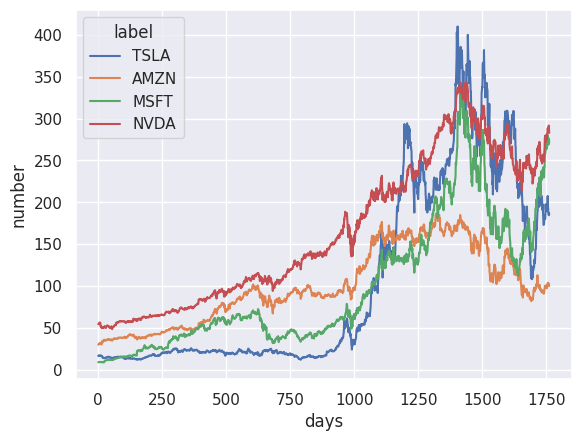

In [ ]:
melted_df = df2.melt('days', var_name='label', value_name='number')
sns.set_theme()
sns.lineplot(melted_df, y = 'number', x = 'days', hue = 'label')#, hue = ['label']



In [ ]:
holdingDays = 252 // 4; #hold a quarter
Ret1 = fn.calculateReturns(df.copy(), 1)
RetQ = fn.calculateReturns(df.copy(), holdingDays)
Ret1.shape, RetQ.shape

((1763, 4), (1763, 4))

In [ ]:
RetFut = RetQ.copy().shift(-(holdingDays+1))
#############################
m = Ret1.shape[0]
trainSize = (m // 3) * 2
testSize = m - trainSize
#############################

#Ret1train = Ret1[:trainSize]
#Ret1test = Ret1[trainSize:]

Ret1train = df[:trainSize].fillna(value=0)
Ret1test = df[trainSize:].fillna(value=0)

m, trainSize, testSize

(1763, 1174, 589)

In [ ]:
Ret1train

,TSLA,AMZN,MSFT,NVDA
0,16.661333,29.796499,8.970000,54.310001
1,16.521334,30.158501,8.960000,54.650002
2,16.968666,30.740999,9.185000,55.349998
3,16.790667,31.037500,9.210000,55.360001
4,16.967333,31.294500,9.282500,55.650002
...,...,...,...,...
1169,189.199997,158.401993,134.014999,214.070007
1170,194.919998,161.003998,133.899994,216.210007
1171,189.606674,160.176498,135.445007,215.369995
1172,197.793335,159.336502,133.960007,214.240005


In [ ]:
Ret1test

,TSLA,AMZN,MSFT,NVDA
1174,213.919998,157.899994,136.067505,214.289993
1175,216.626663,158.864502,133.500000,216.009995
1176,201.493332,155.210007,129.307495,211.800003
1177,209.023331,155.074493,129.722504,210.520004
1178,203.330002,155.820999,130.132507,213.259995
...,...,...,...,...
1758,192.580002,103.949997,274.529999,287.179993
1759,185.520004,101.099998,268.809998,284.339996
1760,185.059998,102.059998,270.369995,291.600006
1761,184.509995,102.169998,275.790009,289.390015


# **Prepareing Data**

In [ ]:
import math
from numpy import array

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def getTrain(data, n_step, K) :
    df0 = data[[K]]
    # train_index, val_index = math.floor(df0.shape[0] * 0.6), math.floor(df0.shape[0] * 0.8)
    train = data[K].values#df0.iloc[: val_index][K].values
    # valid = df0.iloc[train_index : val_index].Close.values
    # test = df0.iloc[val_index :][K].values
    # Define step
    # n_step = 10
    X_train, y_train = split_sequence(train, n_step)
    # X_test, y_test = split_sequence(test, n_step)
    return X_train, y_train#, X_test, y_test, train_index, val_index

X_train1, y_train1= getTrain(Ret1train[['TSLA']], 30, 'TSLA')#, X_test1, y_test1, train_index1, val_index1 
# X_train2, y_train2= getTrain(Ret1train[['ABRV']], 15, 'ABRV')#, X_test2, y_test2, train_index2, val_index2 
X_train3, y_train3= getTrain(Ret1train[['AMZN']], 30, 'AMZN')#, X_test3, y_test3, train_index3, val_index3 
X_train4, y_train4= getTrain(Ret1train[['MSFT']], 30, 'MSFT')#, X_test4, y_test4, train_index4, val_index4 
X_train5, y_train5= getTrain(Ret1train[['NVDA']], 30, 'NVDA')#, X_test5, y_test5, train_index5, val_index5 
# X_train6, y_train6= getTrain(Ret1train[['KIPV']], 15, 'KIPV')#, X_test6, y_test6, train_index6, val_index6 


X_train = np.concatenate([X_train1, X_train3, X_train4, X_train5], axis=0)
y_train = np.concatenate([y_train1, y_train3, y_train4, y_train5], axis=0)
# X_test = np.concatenate([X_test1, X_test2, X_test3, X_test4, X_test5, X_test6], axis=0)
# y_test = np.concatenate([y_test1, y_test2, y_test3, y_test4, y_test5, y_test6], axis=0)

In [ ]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)

minY = y_train.min()
maxY = y_train.max()
y_train2 = (y_train - minY) / (maxY - minY)

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.035752,0.035124,0.037131,0.036332,0.037125,0.036936,0.034990,0.035767,0.035265,0.036898,...,0.022923,0.022536,0.022617,0.022114,0.016240,0.015099,0.013904,0.014664,0.015672,0.016334
1,0.035124,0.037131,0.036332,0.037125,0.036936,0.034990,0.035767,0.035265,0.036898,0.036320,...,0.022854,0.022617,0.022114,0.022213,0.016445,0.014005,0.015868,0.015884,0.017203,0.015107
2,0.037131,0.036332,0.037125,0.036936,0.034990,0.035767,0.035265,0.036898,0.036320,0.036895,...,0.022935,0.022114,0.022213,0.022417,0.015352,0.015968,0.017086,0.017415,0.015977,0.015618
3,0.036332,0.037125,0.036936,0.034990,0.035767,0.035265,0.036898,0.036320,0.036895,0.036216,...,0.022433,0.022213,0.022417,0.021330,0.017312,0.017186,0.018615,0.016189,0.016488,0.016123
4,0.037125,0.036936,0.034990,0.035767,0.035265,0.036898,0.036320,0.036895,0.036216,0.035091,...,0.022531,0.022417,0.021330,0.023279,0.018529,0.018715,0.017390,0.016699,0.016992,0.017797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4571,0.946224,0.921825,0.923753,0.924426,0.924830,0.930840,0.903256,0.917474,0.870066,0.879216,...,0.932056,0.935266,0.922831,0.907657,0.913146,0.903846,0.902569,0.919433,0.919461,0.925556
4572,0.921825,0.923753,0.924426,0.924830,0.930840,0.903256,0.917474,0.870066,0.879216,0.869125,...,0.935287,0.922831,0.907657,0.913673,0.903977,0.902579,0.919531,0.919478,0.925621,0.920297
4573,0.923753,0.924426,0.924830,0.930840,0.903256,0.917474,0.870066,0.879216,0.869125,0.868497,...,0.922856,0.907657,0.913673,0.904560,0.902712,0.919540,0.919577,0.925637,0.920367,0.929999
4574,0.924426,0.924830,0.930840,0.903256,0.917474,0.870066,0.879216,0.869125,0.868497,0.886886,...,0.907688,0.913673,0.904560,0.903303,0.919650,0.919585,0.925728,0.920384,0.930061,0.926190


In [ ]:
X_test1, y_test1= getTrain(Ret1test[['TSLA']], 30, 'TSLA')#, X_test1, y_test1, train_index1, val_index1 
# X_test2, y_test2= getTrain(Ret1test[['ABRV']], 15, 'ABRV')#, X_test2, y_test2, train_index2, val_index2 
X_test3, y_test3= getTrain(Ret1test[['AMZN']], 30, 'AMZN')#, X_test3, y_test3, train_index3, val_index3 
X_test4, y_test4= getTrain(Ret1test[['MSFT']], 30, 'MSFT')#, X_test4, y_test4, train_index4, val_index4 
X_test5, y_test5= getTrain(Ret1test[['NVDA']], 30, 'NVDA')#, X_test5, y_test5, train_index5, val_index5 
# X_test6, y_test6= getTrain(Ret1test[['KIPV']], 15, 'KIPV')#, X_test6, y_test6, train_index6, val_index6 


X_test = np.concatenate([X_test1, X_test3, X_test4, X_test5], axis=0)
y_test = np.concatenate([y_test1, y_test3, y_test4, y_test5], axis=0)

X_test = scaler.transform(X_test)
y_test2 = (y_test - minY) / (maxY - minY)

pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.920479,0.932619,0.864744,0.898517,0.872982,0.917594,0.907756,0.892088,0.941619,1.000075,...,1.091295,1.181199,1.276938,1.173941,1.232590,1.240401,1.226238,1.198074,1.225884,1.235000
1,0.932619,0.864744,0.898517,0.872982,0.917594,0.907756,0.892088,0.941619,1.000075,0.932589,...,1.181140,1.276938,1.173941,1.231178,1.240073,1.226215,1.197832,1.225835,1.234792,1.226748
2,0.864744,0.898517,0.872982,0.917594,0.907756,0.892088,0.941619,1.000075,0.932589,0.918356,...,1.276848,1.173941,1.231178,1.238615,1.225906,1.197812,1.225559,1.234742,1.226548,1.229242
3,0.898517,0.872982,0.917594,0.907756,0.892088,0.941619,1.000075,0.932589,0.918356,0.926788,...,1.173884,1.231178,1.238615,1.224534,1.197541,1.225536,1.234455,1.226499,1.229039,1.280866
4,0.872982,0.917594,0.907756,0.892088,0.941619,1.000075,0.932589,0.918356,0.926788,0.950395,...,1.231103,1.238615,1.224534,1.196342,1.225228,1.234431,1.226223,1.228990,1.280618,1.284327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,1.094277,1.089074,1.103696,1.078803,1.083019,1.079700,1.065572,1.087280,1.106028,1.113114,...,1.189068,1.182441,1.206548,1.219611,1.202028,1.197103,1.221006,1.237308,1.256611,1.251986
2232,1.089074,1.103696,1.078803,1.083019,1.079700,1.065572,1.087280,1.106028,1.113114,1.100915,...,1.182381,1.206548,1.219611,1.200801,1.196834,1.220984,1.237018,1.256555,1.251764,1.251760
2233,1.103696,1.078803,1.083019,1.079700,1.065572,1.087280,1.106028,1.113114,1.100915,1.098897,...,1.206480,1.219611,1.200801,1.195639,1.220682,1.236994,1.256242,1.251710,1.251537,1.238884
2234,1.078803,1.083019,1.079700,1.065572,1.087280,1.106028,1.113114,1.100915,1.098897,1.092707,...,1.219540,1.200801,1.195639,1.219342,1.236670,1.256216,1.251402,1.251483,1.238673,1.271799


In [ ]:
# pd.DataFrame(np.concatenate([X_test1, X_test3, X_test4, X_test5], axis=0))
# pd.DataFrame(X_test3)

In [ ]:
# y_test[:20]

In [ ]:
# y_test.reshape(4, int(y_test.shape[0]/4)).T

# **Modeling**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import keras

def setupModel(n_step) :
    model0 = Sequential()
    model0.add(LSTM(50, activation='relu', input_shape=(n_step, 1)))
    model0.add(Dropout(0.1))
    model0.add(Dense(256))
    model0.add(Dropout(0.2))
    model0.add(Dense(64))
    model0.add(Dropout(0.1))
    model0.add(Dense(1))
    optimizer = keras.optimizers.Adam(lr=0.005)
    model0.compile(optimizer=optimizer, loss='mse')
    return model0



In [ ]:
model0 = setupModel(n_step = 30)
history = model0.fit(X_train, y_train2, epochs=30, verbose=1, validation_split=0.2)
loss = history.history['loss']
val_loss = history.history['val_loss']
print('Model finished')

Epoch 1/30
115/115 [==============================] - 5s 21ms/step - loss: 0.0030 - val_loss: 3.9308e-04
Epoch 2/30
115/115 [==============================] - 2s 20ms/step - loss: 9.3181e-04 - val_loss: 0.0018
Epoch 3/30
115/115 [==============================] - 2s 19ms/step - loss: 8.2977e-04 - val_loss: 2.1400e-04
Epoch 4/30
115/115 [==============================] - 2s 20ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 5/30
115/115 [==============================] - 3s 28ms/step - loss: 8.8557e-04 - val_loss: 8.9767e-04
Epoch 6/30
115/115 [==============================] - 2s 21ms/step - loss: 7.5438e-04 - val_loss: 9.0662e-04
Epoch 7/30
115/115 [==============================] - 2s 19ms/step - loss: 9.1243e-04 - val_loss: 4.7712e-04
Epoch 8/30
115/115 [==============================] - 2s 18ms/step - loss: 9.8058e-04 - val_loss: 9.8237e-04
Epoch 9/30
115/115 [==============================] - 2s 18ms/step - loss: 7.4256e-04 - val_loss: 6.7335e-04
Epoch 10/30
115/115 [==============

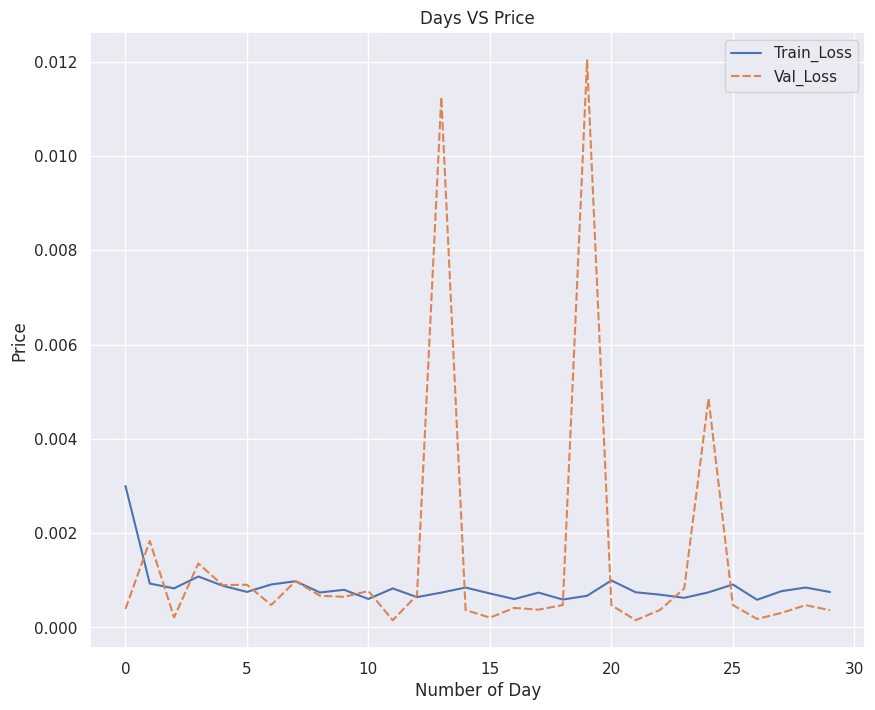

In [ ]:
L = pd.DataFrame({'Train_Loss' : loss, 'Val_Loss' : val_loss})
plt.figure(figsize = (10, 8))
ax1 = sns.lineplot(data = L)
ax1.set(xlabel='Number of Day', ylabel='Price', title = 'Days VS Price')
plt.show()

In [ ]:
path2 = '/content/drive/MyDrive/APS1052/Multi_Asset/model/'

modelname = 'LSTM_price_step30_v1.h5'

# model0.save_weights(path2 + modelname)  # to store
model0 = setupModel(n_step = 30)
model0.load_weights(path2 + modelname)  # to load

# **Testing and Visualization**

**Training Cumulative Return**

In [ ]:
yhat = model0.predict(X_train, verbose=0)
yhat = yhat * (maxY - minY) + minY

rt = pd.DataFrame({'Pred' : yhat.T[0]})
rt = rt.to_numpy().reshape(4, int(rt.shape[0]/4)).T
rt = pd.DataFrame(rt, columns=df.columns.tolist())
rt['days'] = rt.index

rt_2 = rt.melt('days', var_name='label', value_name='number')
rt = rt.drop(['days'], axis = 1)



rt2 = pd.DataFrame({'Actual' : y_train})
rt2 = rt2.to_numpy().reshape(4, int(rt2.shape[0]/4)).T
rt2 = pd.DataFrame(rt2, columns=df.columns.tolist())
rt2['days'] = rt2.index

rt2_2 = rt2.melt('days', var_name='label', value_name='number')
rt2 = rt2.drop(['days'], axis = 1)

yhat.shape

(4576, 1)

[]

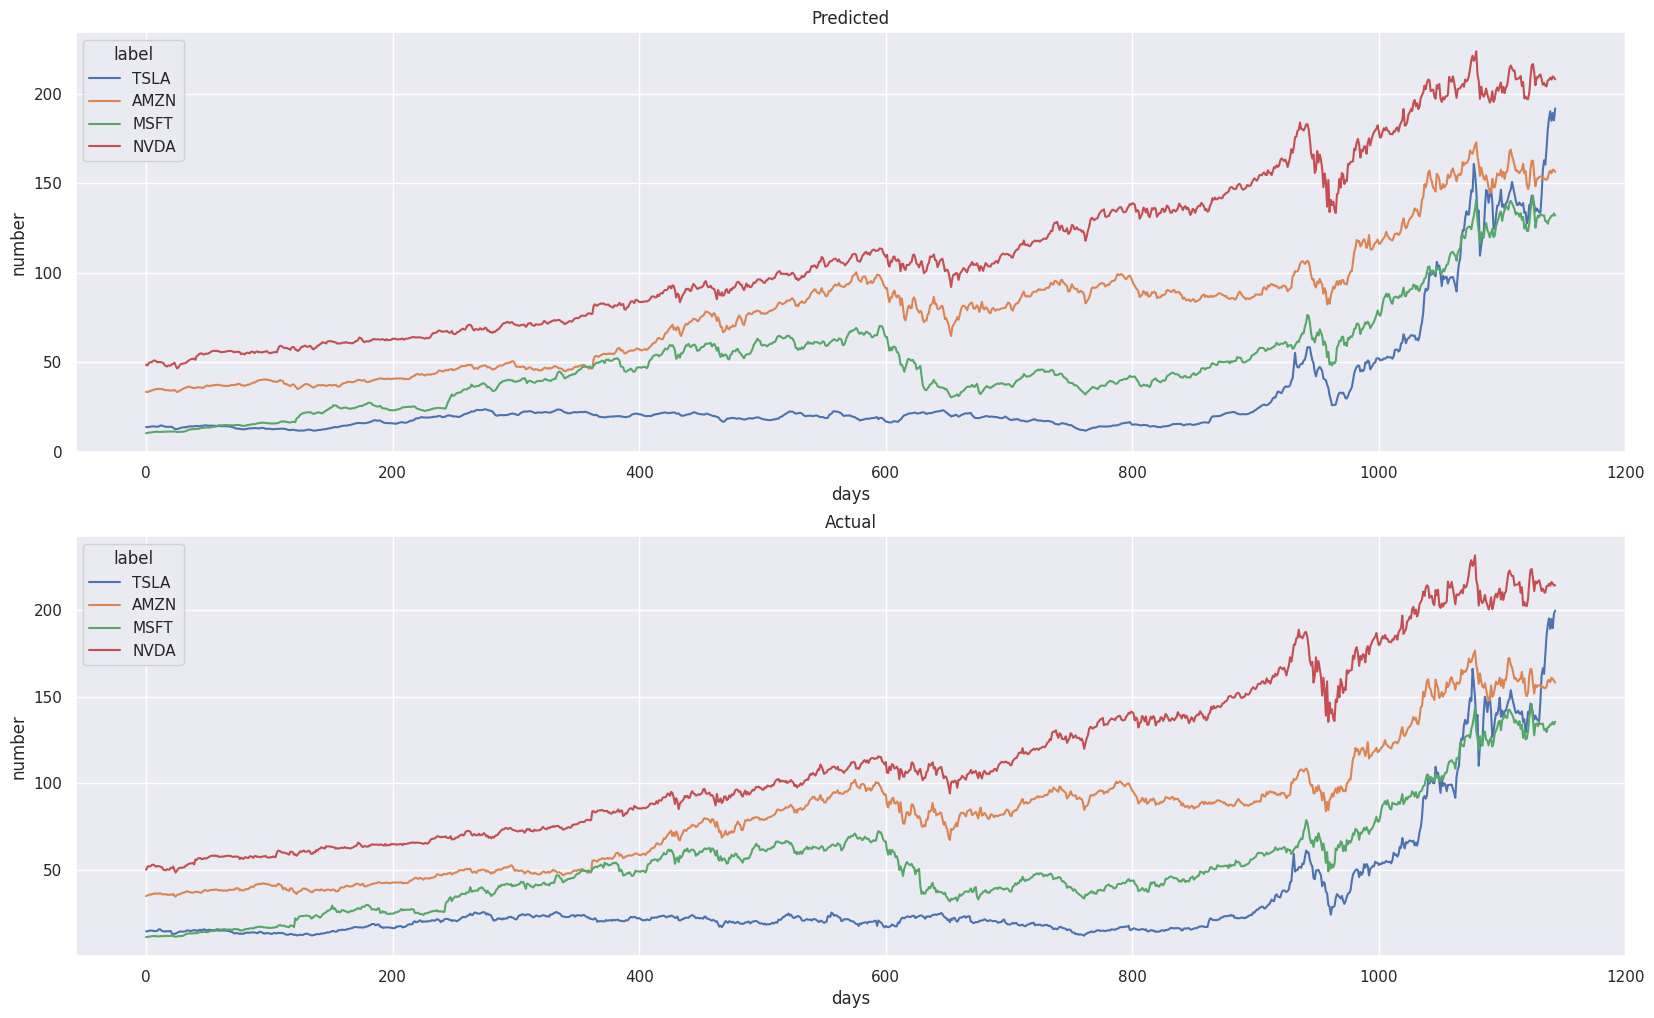

In [ ]:
fig = plt.figure(figsize = (20, 12))
ax1 = fig.add_subplot(211)
sns.set_theme()

ax1.set_title('Predicted')
sns.lineplot(rt_2, y = 'number', x = 'days', hue = 'label')#, hue = ['label']

ax2 = fig.add_subplot(212)
ax2.set_title('Actual')
sns.lineplot(rt2_2, y = 'number', x = 'days', hue = 'label')
plt.plot()

In [ ]:
# pred2 = pd.DataFrame(yhat.T[0])
retPred_test = fn.calculateReturns(rt.copy(), 1).fillna(0)
# retPred_test = pred2.to_numpy().reshape(int(pred2.shape[0]/4), 4)
retPred_test = pd.DataFrame(retPred_test)
retPred_test

,TSLA,AMZN,MSFT,NVDA
0,0.000000,0.000000,0.000000,0.000000
1,0.000305,-0.003144,0.009619,-0.008609
2,0.004609,0.005840,0.016093,0.022590
3,0.005928,0.007588,0.005791,0.013938
4,0.015083,0.010786,0.008706,0.001029
...,...,...,...,...
1139,0.021279,0.005515,0.006546,0.005904
1140,-0.027657,-0.008470,0.009894,-0.004825
1141,0.023343,0.013237,0.000003,0.008464
1142,-0.021522,-0.002262,0.009541,-0.002803


In [ ]:
retPred_test2 = fn.calculateReturns(Ret1train.copy(), 1).fillna(0)
retPred_test2 = retPred_test2.iloc[30:].reset_index(drop = True)
retPred_test2.loc[0, :] = 0
retPred_test2

,TSLA,AMZN,MSFT,NVDA
0,0.000000,0.000000,0.000000,0.000000
1,0.007816,0.010692,0.021622,0.031181
2,0.007664,0.005893,-0.004189,0.010273
3,0.025230,0.009261,0.010627,-0.004413
4,-0.009240,-0.003735,0.005476,0.008287
...,...,...,...,...
1139,-0.031002,-0.008544,0.010576,-0.005390
1140,0.030233,0.016427,-0.000858,0.009997
1141,-0.027259,-0.005140,0.011539,-0.003885
1142,0.043177,-0.005244,-0.010964,-0.005247


In [ ]:
longs = pd.DataFrame((retPred_test>0).astype(int)).shift(1) #1 day later
shorts = pd.DataFrame((retPred_test<0).astype(int)).shift(1)
longs.loc[0] = 0
shorts.loc[0] = 0

# retPred_test.shape, longs.shape, shorts.shape

positions = np.zeros(retPred_test.shape)

for h in range(holdingDays):
    long_lag = longs.shift(h)
    long_lag.fillna(value=0, inplace=True)
    long_lag = long_lag.astype(bool).values
    
    short_lag = shorts.shift(h)
    short_lag.fillna(value=0, inplace=True)
    short_lag = short_lag.astype(bool).values
    
    positions[long_lag] += 1
    positions[short_lag] -= 1

dRetA = np.sum(np.multiply(pd.DataFrame(positions).shift(1).fillna(0).values.squeeze(), 
                           retPred_test.fillna(0).values), axis = 1)
               

dPos = np.sum(pd.DataFrame(positions).shift(1).abs().values.squeeze(), axis = 1)

# dRetA.shape, dPos.shape

dailyRet = np.divide(dRetA, dPos)
dailyRet[~np.isfinite(dailyRet)] = 0
cumret = np.cumprod(1 + dailyRet) - 1

dailyRet.shape, cumret.shape

((1144,), (1144,))

In [ ]:
longs2 = pd.DataFrame((retPred_test2>0).astype(int)).shift(1) #1 day later
shorts2 = pd.DataFrame((retPred_test2<0).astype(int)).shift(1)
longs2.loc[0] = 0
shorts2.loc[0] = 0

# retPred_test.shape, longs.shape, shorts.shape

positions2 = np.zeros(retPred_test2.shape)

for h in range(holdingDays):
    long_lag2 = longs2.shift(h)
    long_lag2.fillna(value=0, inplace=True)
    long_lag2 = long_lag2.astype(bool).values
    
    short_lag2 = shorts2.shift(h)
    short_lag2.fillna(value=0, inplace=True)
    short_lag2 = short_lag2.astype(bool).values
    
    positions2[long_lag2] += 1
    positions2[short_lag2] -= 1

dRetA2 = np.sum(np.multiply(pd.DataFrame(positions2).shift(1).fillna(0).values.squeeze(), 
                           retPred_test2.fillna(0).values), axis = 1)
               

dPos2 = np.sum(pd.DataFrame(positions2).shift(1).abs().values.squeeze(), axis = 1)

# dRetA.shape, dPos.shape

dailyRet2 = np.divide(dRetA2, dPos2)
dailyRet2[~np.isfinite(dailyRet2)] = 0
cumret2 = np.cumprod(1 + dailyRet2) - 1

dailyRet2.shape, cumret2.shape

((1144,), (1144,))

in-sample: CAGR=1.53752 Sharpe ratio=2.02307 maxDD=-0.412351 maxDDD=301 Calmar ratio=3.72866


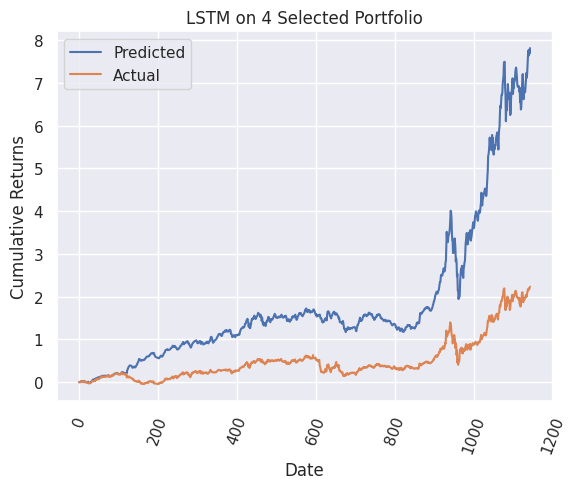

In [ ]:
plt.figure(2)
plt.xticks(rotation=70)
plt.plot(retPred_test.index, cumret, label = 'Predicted')
plt.plot(retPred_test2.index, cumret2, label = 'Actual')
plt.title('LSTM on 4 Selected Portfolio')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.legend()

cagr = (1 + cumret[-1]) ** (252 / testSize) - 1
maxDD, maxDDD, _ = fn.calculateMaxDD(cumret)
ratio = (252.0 ** 0.5) * np.mean(dailyRet) / np.std(dailyRet)
print(('in-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD))

plt.show()

**Testing Cumulative Return**

In [ ]:
yhat = model0.predict(X_test, verbose=0)
yhat = yhat * (maxY - minY) + minY

rt = pd.DataFrame({'Pred' : yhat.T[0]})
rt = rt.to_numpy().reshape(4, int(rt.shape[0]/4)).T
rt = pd.DataFrame(rt, columns=df.columns.tolist())
rt['days'] = rt.index

rt_2 = rt.melt('days', var_name='label', value_name='number')
rt = rt.drop(['days'], axis = 1)



rt2 = pd.DataFrame({'Actual' : y_test})
rt2 = rt2.to_numpy().reshape(4, int(rt2.shape[0]/4)).T
rt2 = pd.DataFrame(rt2, columns=df.columns.tolist())
rt2['days'] = rt2.index

rt2_2 = rt2.melt('days', var_name='label', value_name='number')
rt2 = rt2.drop(['days'], axis = 1)

yhat.shape

(2236, 1)

In [ ]:
# rt2_2[rt2_2.label == 'AMZN'].number.describe()
rt

,TSLA,AMZN,MSFT,NVDA
0,270.144958,159.281006,130.986099,216.866409
1,268.617310,162.079529,136.008026,217.775330
2,269.164795,161.651855,135.229156,218.754837
3,279.121613,161.439529,134.276596,221.877136
4,279.528870,162.864441,132.068588,224.412903
...,...,...,...,...
554,190.069870,101.060966,266.738708,273.419891
555,186.996292,102.065765,262.335449,273.485077
556,180.991852,99.639496,257.447693,271.006439
557,180.199661,99.870964,258.757538,277.432098


[]

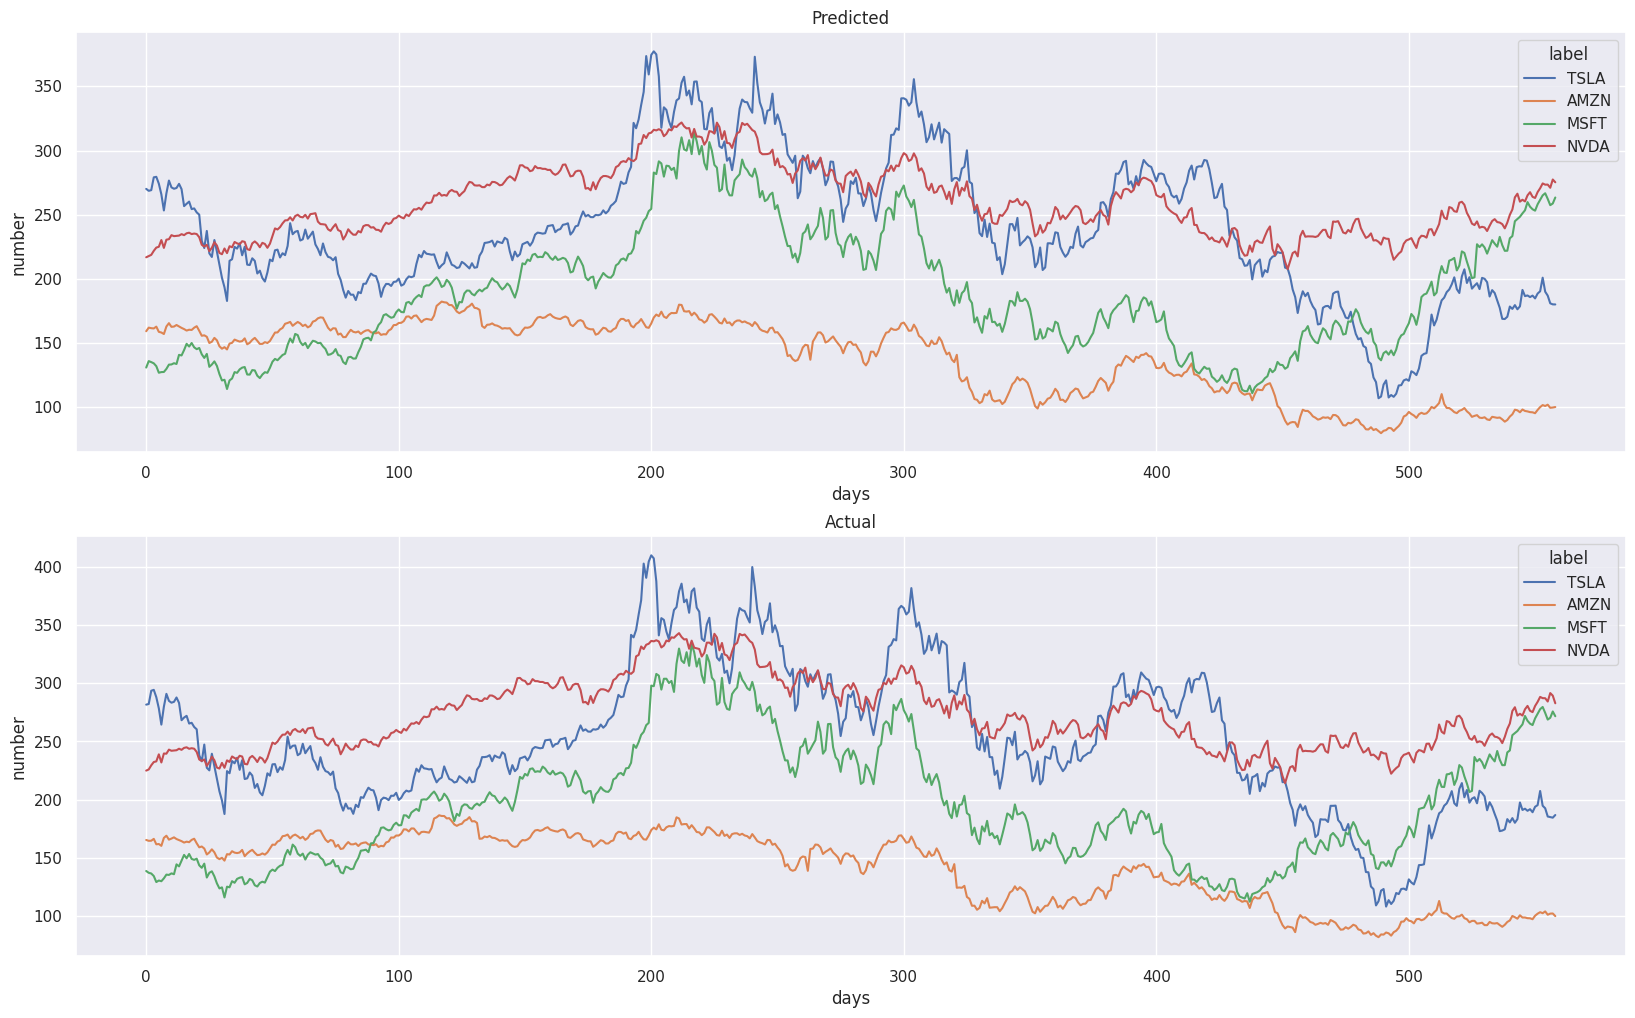

In [ ]:
fig = plt.figure(figsize = (20, 12))
ax1 = fig.add_subplot(211)
sns.set_theme()

ax1.set_title('Predicted')
sns.lineplot(rt_2, y = 'number', x = 'days', hue = 'label')#, hue = ['label']

ax2 = fig.add_subplot(212)
ax2.set_title('Actual')
sns.lineplot(rt2_2, y = 'number', x = 'days', hue = 'label')
plt.plot()

In [ ]:
# pred2 = pd.DataFrame(yhat.T[0])
retPred_test = fn.calculateReturns(rt.copy(), 1).fillna(0)
# retPred_test = pred2.to_numpy().reshape(int(pred2.shape[0]/4), 4)
retPred_test = pd.DataFrame(retPred_test)
retPred_test

,TSLA,AMZN,MSFT,NVDA
0,0.000000,0.000000,0.000000,0.000000
1,-0.005655,0.017570,0.038339,0.004191
2,0.002038,-0.002639,-0.005727,0.004498
3,0.036992,-0.001313,-0.007044,0.014273
4,0.001459,0.008826,-0.016444,0.011429
...,...,...,...,...
554,-0.054340,-0.006844,0.006297,-0.003484
555,-0.016171,0.009943,-0.016508,0.000238
556,-0.032110,-0.023772,-0.018632,-0.009063
557,-0.004377,0.002323,0.005088,0.023710


In [ ]:
retPred_test2 = fn.calculateReturns(Ret1test.copy(), 1).fillna(0)
retPred_test2 = retPred_test2.iloc[30:].reset_index(drop = True)
retPred_test2.loc[0, :] = 0
retPred_test2

,TSLA,AMZN,MSFT,NVDA
0,0.000000,0.000000,0.000000,0.000000
1,0.001953,-0.004463,-0.011177,0.004356
2,0.040348,0.000538,-0.004321,0.015844
3,0.002600,0.009754,-0.015967,0.012199
4,-0.021436,-0.028126,-0.038518,0.002453
...,...,...,...,...
554,-0.011244,0.015038,-0.018309,-0.000174
555,-0.036660,-0.027417,-0.020836,-0.009889
556,-0.002480,0.009496,0.005803,0.025533
557,-0.002972,0.001078,0.020047,-0.007579


In [ ]:
longs = pd.DataFrame((retPred_test>0).astype(int)).shift(1) #1 day later
shorts = pd.DataFrame((retPred_test<0).astype(int)).shift(1)
longs.loc[0] = 0
shorts.loc[0] = 0

# retPred_test.shape, longs.shape, shorts.shape

positions = np.zeros(retPred_test.shape)

for h in range(holdingDays):
    long_lag = longs.shift(h)
    long_lag.fillna(value=0, inplace=True)
    long_lag = long_lag.astype(bool).values
    
    short_lag = shorts.shift(h)
    short_lag.fillna(value=0, inplace=True)
    short_lag = short_lag.astype(bool).values
    
    positions[long_lag] += 1
    positions[short_lag] -= 1

dRetA = np.sum(np.multiply(pd.DataFrame(positions).shift(1).fillna(0).values.squeeze(), 
                           retPred_test.fillna(0).values), axis = 1)
               

dPos = np.sum(pd.DataFrame(positions).shift(1).abs().values.squeeze(), axis = 1)

# dRetA.shape, dPos.shape

dailyRet = np.divide(dRetA, dPos)
dailyRet[~np.isfinite(dailyRet)] = 0
cumret = np.cumprod(1 + dailyRet) - 1

dailyRet.shape, cumret.shape

((559,), (559,))

In [ ]:
longs2 = pd.DataFrame((retPred_test2>0).astype(int)).shift(1) #1 day later
shorts2 = pd.DataFrame((retPred_test2<0).astype(int)).shift(1)
longs2.loc[0] = 0
shorts2.loc[0] = 0

# retPred_test.shape, longs.shape, shorts.shape

positions2 = np.zeros(retPred_test2.shape)

for h in range(holdingDays):
    long_lag2 = longs2.shift(h)
    long_lag2.fillna(value=0, inplace=True)
    long_lag2 = long_lag2.astype(bool).values
    
    short_lag2 = shorts2.shift(h)
    short_lag2.fillna(value=0, inplace=True)
    short_lag2 = short_lag2.astype(bool).values
    
    positions2[long_lag2] += 1
    positions2[short_lag2] -= 1

dRetA2 = np.sum(np.multiply(pd.DataFrame(positions2).shift(1).fillna(0).values.squeeze(), 
                           retPred_test2.fillna(0).values), axis = 1)
               

dPos2 = np.sum(pd.DataFrame(positions2).shift(1).abs().values.squeeze(), axis = 1)

# dRetA.shape, dPos.shape

dailyRet2 = np.divide(dRetA2, dPos2)
dailyRet2[~np.isfinite(dailyRet2)] = 0
cumret2 = np.cumprod(1 + dailyRet2) - 1

dailyRet2.shape, cumret2.shape

((559,), (559,))

Out-of-sample: CAGR=0.00302136 Sharpe ratio=0.161241 maxDD=-0.426614 maxDDD=317 Calmar ratio=0.00708218


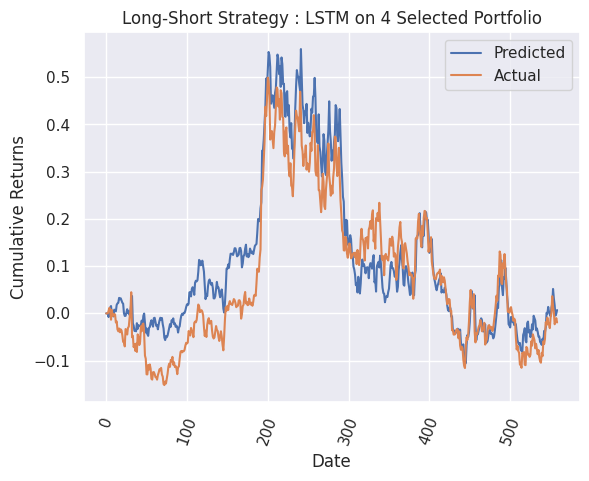

In [ ]:
plt.figure(2)
plt.xticks(rotation=70)
plt.plot(retPred_test.index, cumret, label = 'Predicted')
plt.plot(retPred_test2.index, cumret2, label = 'Actual')
plt.title('Long-Short Strategy : LSTM on 4 Selected Portfolio')
plt.ylabel('Cumulative Returns')
plt.xlabel('Date')
plt.legend()

cagr = (1 + cumret[-1]) ** (252 / testSize) - 1
maxDD, maxDDD, _ = fn.calculateMaxDD(cumret)
ratio = (252.0 ** 0.5) * np.mean(dailyRet) / np.std(dailyRet)
print(('Out-of-sample: CAGR={:0.6} Sharpe ratio={:0.6} maxDD={:0.6} maxDDD={:d} Calmar ratio={:0.6}'\
).format(cagr, ratio, maxDD, maxDDD.astype(int), -cagr/maxDD))

plt.show()

In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#seaborn.mpl.rcParams['figure.figsize'] = (10.0, 6.0)
#seaborn.mpl.rcParams['savefig.dpi'] = 90
'''
https://people.duke.edu/~ccc14/sta-663/ResamplingAndMonteCarloSimulations.html
This subroutine will calculate White's Reality Check for a single trading rule
in accordance with Aronson's Evidence Based Technical Analysis p.237ff

'''


#returns must be detrended by subtracting the average daily return of the benchmark
def bootstrap(ser):
    ser.dropna(inplace=True)
    arr = np.array(ser.values)
    alpha = .05*100 #significance alpha
    reps = 5000 #how many bootstrapings, 50000 limit if you have 8GB RAM

    percentile = 100-alpha
    ave = np.average(arr) #arithmetic mean

    print("average return %f" %ave)

    #ave = ms.gmean(arr) #geometric mean

    centered_arr = arr-ave
    n = len(centered_arr)
    #constructs 50000 alternative return histories and calculates their theoretical averages
    xb = np.random.choice(centered_arr, (n, reps), replace=True)
    mb = xb.mean(axis=0) #arithmetic mean
    #mb = ms.gmean(mb, axis=0) #geometric mean

    #sorts the 50000 averages
    mb.sort()
    #calculates the 95% conficence interval (two tails) threshold for the theoretical averages
    print(np.percentile(mb, [2.5, 97.5])) 
    threshold = np.percentile(mb, [percentile])[0]


    if ave > threshold:
        print("Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)")
    else:
        print("Do not reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is not small enough)")

    #count will be the items i that are smaller than ave
    count_vals = 0
    for i in mb:
        count_vals += 1
        if i > ave:
            break
        
    #p is based on the count that are larger than ave so 1-count is needed:
    p = 1-count_vals/len(mb)

    print("p_value:")
    print(p)


    
    #histogram
    sr = pd.Series(mb)
    desc = sr.describe()
    count = desc[0]
    std = desc[2]
    minim = desc[3]
    maxim = desc[7]
    R = maxim-minim
    n = count
    s = std
    bins = int(round(R*(n**(1/3))/(3.49*std),0))
    fig = sr.hist(bins=bins)
   # plt.show()
    

    #about the histogram
    #https://stackoverflow.com/questions/33458566/how-to-choose-bins-in-matplotlib-histogram
    #R(n^(1/3))/(3.49σ)
    #R is the range of data (in your case R = 3-(-3)= 6),
    #n is the number of samples,
    #σ is your standard deviation.


average return 0.107068
[-0.01341451  0.01324312]
Reject Ho = The population distribution of rule returns has an expected value of zero or less (because p_value is small enough)
p_value:
0.0


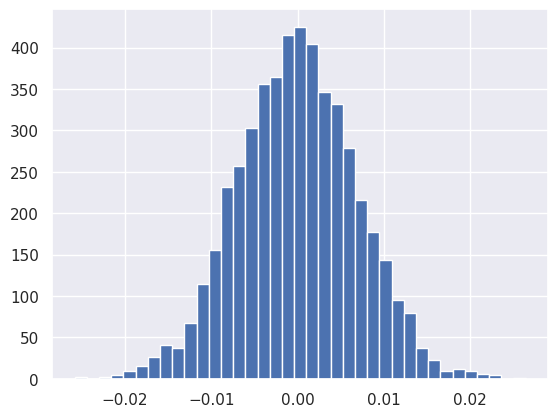

In [ ]:
bootstrap(pd.Series(cumret))
plt.show()

# **Equity Curve Calculation**

In [ ]:
retPred_Test = retPred_test.copy()
retPred_Test2 = retPred_test2.copy()

for i in retPred_Test.columns :
    retPred_Test[i] = np.cumprod(1 + retPred_Test[i]) - 1
for i in retPred_Test2.columns :
    retPred_Test2[i] = np.cumprod(1 + retPred_Test2[i]) - 1



retPred_Test['days'] = retPred_Test.index
retPred_test_ec = retPred_Test.melt('days', var_name='label', value_name='number')
retPred_Test = retPred_Test.drop(['days'], axis = 1)

retPred_Test2['days'] = retPred_Test2.index
retPred_test2_ec = retPred_Test2.melt('days', var_name='label', value_name='number')
retPred_Test2 = retPred_Test2.drop(['days'], axis = 1)


[]

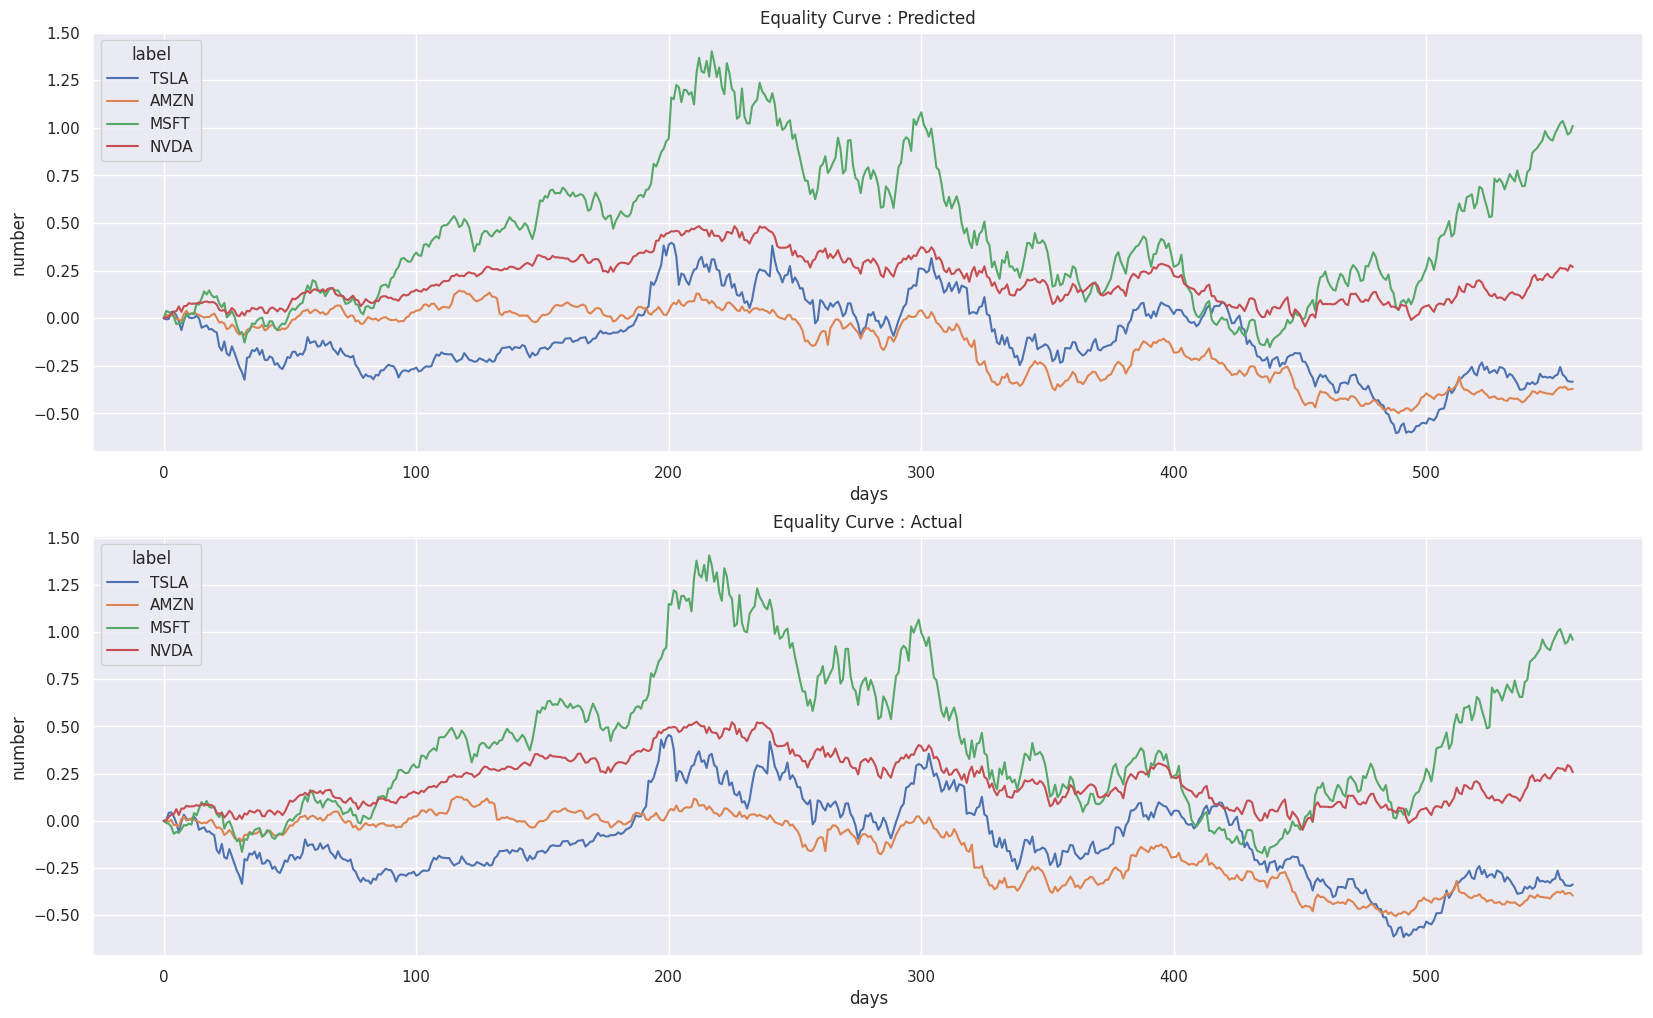

In [ ]:
fig = plt.figure(figsize = (20, 12))
ax1 = fig.add_subplot(211)
sns.set_theme()

ax1.set_title('Equality Curve : Predicted')
sns.lineplot(retPred_test_ec, y = 'number', x = 'days', hue = 'label')#, hue = ['label']

ax2 = fig.add_subplot(212)
ax2.set_title('Equality Curve : Actual')
sns.lineplot(retPred_test2_ec, y = 'number', x = 'days', hue = 'label')
plt.plot()

In [ ]:
retPred_Test2['EC'] = (retPred_Test2.TSLA + retPred_Test2.AMZN + retPred_Test2.MSFT + retPred_Test2.NVDA) / 4
retPred_Test['EC'] = (retPred_Test.TSLA + retPred_Test.AMZN + retPred_Test.MSFT + retPred_Test.NVDA) / 4

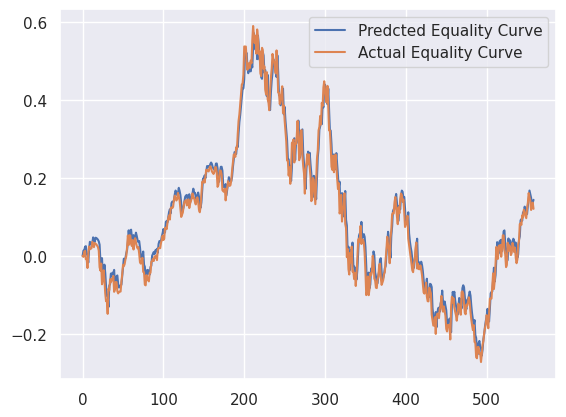

In [ ]:
sns.set_theme()
retPred_Test.EC.plot(label = 'Predcted Equality Curve')
retPred_Test2.EC.plot(label = 'Actual Equality Curve')
plt.legend()
plt.show()